Author:  Raphael Cousin

Project: https://github.com/racousin/algorithms_basics_python

# Theory

__Context:__

* Data : $X_1,..,X_n \sim f$ where $f$ is a density with support $I = [a,b]$ 

* estimator: $\hat{f}_D(x)=\frac{D}{b-a} \sum_{k=1}^D \frac{1}{n}(\sum_{i=1}^n \mathbb{1}(X_i \in I_{k,D}))\mathbb{1}(x \in I_{k,D}))$, with $I_{k,d} = [a + (k -1) \frac{b-a}{D}, a + k \frac{b-a}{D}[$

* sample size: $n$

In [1]:
from scipy.stats import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.discriminant_analysis import LinearClassifierMixin

In [2]:
np.random.seed(seed=233423)
n = 10000
gauss = norm(loc=0, scale=1)
rnorm = lambda n : gauss.rvs(n)

In [3]:
class histo(BaseEstimator, LinearClassifierMixin):
    def __init__(self, D = 1, a=None, b =None):
        self.f_hat = None
        self.D = D
        self.a = a
        self.b = b
        self.abD = None
        self.f_I = None
        self.ks = np.arange(1,D)
        
    def fit(self, X):
        if self.a is None:
            self.a = X.min();
        if self.b is None:
            self.b = X.max();
        self.abD = (self.b - self.a) / self.D
        def f_I(xs,ks):
            res = np.zeros(shape=(len(xs),len(ks)));
            for _,k in enumerate(ks):
                res[:,_] = (xs >= self.a + (k-1) * (self.abD)) & (xs < self.a + k * (self.abD))
            return res
        self.f_I = lambda x:f_I(x, self.ks)
        self.f_hat = lambda x: self.f_I(x).dot(self.f_I(X).mean(axis=0)) / self.abD
        
        
    def predict(self, x):
        return self.f_hat(x)
    

    def plot(self, X):
        return np.sign(self.decision_function(X))

In [4]:
X = rnorm(n)

In [7]:
hist = histo(D=30)
hist.fit(X)
xs = np.linspace(X.min(),X.max(),300)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


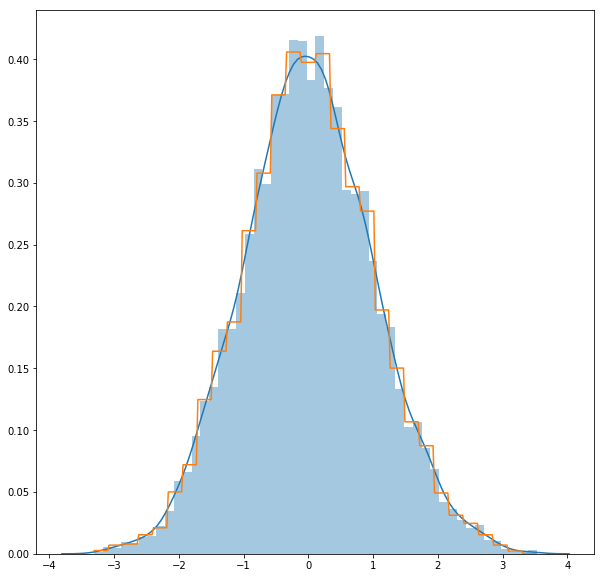

In [8]:
fig,ax = plt.subplots(figsize = (10,10))
sns.distplot(X)
ax.plot(xs, hist.predict(xs))